# **Geospatial Data Visualization**

Most famous GIS software like ArcGIS and QGIS provide an interface for coding with python.

Python is a great language for geographic data analysis.

- Several libraries for GIS
- Python GIS is efficent and flexible
- It is free.
- You are not limited with only one library/software

Core libraries for GIS in Python:
- `geopandas` (vector data, uses points)
- `rasterio` (raster data, pixels)
- `plotly` can also be used for map visualization.


In this tutorial, we will work with vector data format(points, lines, areas)

The goal is not to overwhelm you with the underhood information, rather it is more pragmatic, I want to show how you can use Python for GIS work.

Knowing `pandas` is important because we are still working with pandas dataframe (with additional geometry or condinates columns).

Some key terms:

- Coordinate reference system (CRS)
  - Map projections
  - European Petroleum Survey Group (EPSG) codes such as such as 4326 for WGS84
  - Well-known text (WKT)



<img src= 'http://2.bp.blogspot.com/_w2il4gKpkFM/TQIjHzmG-NI/AAAAAAAAAE4/wT7lDzOVtKc/s320/laranjoide.jpg' width=500/>


<img src= 'http://2.bp.blogspot.com/_w2il4gKpkFM/TQIm8ybZBfI/AAAAAAAAAFA/tDLKES_dbdQ/s320/laranjoide_1.jpg' width=500/>

[Source](http://profdrikageografia.blogspot.com/2010_12_01_archive.html)


<img src= 'https://pythongis.org/_images/projections.jpg' width=500/>


[Source](https://pythongis.org/part2/chapter-05/nb/02-introduction-to-coordinate-reference-systems.html)

# **`Geopandas`** basics

Geopandas uses several other packages. One of them is `shapely`. It helps to create points, lines, poligons, etc.

### **`Point()`**


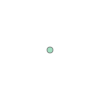

In [1]:
from shapely.geometry import Point


point = Point(1.2, 3.1)
point3D = Point(9.26, -2.456, 0.57)

point

In [2]:
print(point)
print(point3D)

POINT (1.2 3.1)
POINT Z (9.26 -2.456 0.57)


In [3]:
#coordinates of the point geometry
list(point.coords)

[(1.2, 3.1)]

In [4]:
# coordinates
print(point.x)
print(point.y)

1.2
3.1


## **`LineString`**

This is essentially means line.

We need least two points for creating a line.

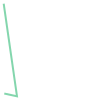

In [5]:
from shapely.geometry import Point, LineString

point1 = Point(3.1, 4.9)
point2 = Point(6.7, -20.2)
point3 = Point(3.26, -19.456)

line = LineString([point1, point2, point3])
# line_from_tuples = LineString([(3.1, 4.9), (6.7, -20.2), (3.26, -6.456)])
line

In [6]:
# this is actually WKT representation of the line

print(line)

LINESTRING (3.1 4.9, 6.7 -20.2, 3.26 -19.456)


In [7]:
length = line.length #lenght of line
centroid = line.centroid #center of line
print(f"Length of our line: {length:.2f} units")
print(f"Centroid: {centroid}")

Length of our line: 28.88 units
Centroid: POINT (4.909750627138961 -9.134289216228249)


## **`Polygons`**

So the same logic. Polygons essentially mean area. An area would have lines surrounded. So it uses points to create that shape.

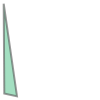

In [8]:
from shapely.geometry import Polygon

pol = Polygon([point1, point2, point3])
pol

In [9]:
#Polygon WKT representation has double parentheses around the coordinates

print(pol)

POLYGON ((3.1 4.9, 6.7 -20.2, 3.26 -19.456, 3.1 4.9))


## MultiPoint, MultiLineString and MultiPolygon

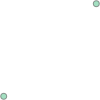

In [10]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon

multipoint = MultiPoint([Point(2, 2), Point(3, 3)])
multipoint

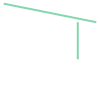

In [11]:
multiline = MultiLineString([LineString([(2, 4), (7, 3)]),
                             LineString([(6, 3), (6, 1)])])
multiline

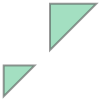

In [12]:
multipoly = MultiPolygon([Polygon([(0, 0), (0, 4), (4, 4)]),
                          Polygon([(6, 6), (6, 12), (12, 12)])])
multipoly

So why do we learn these?

Well, these will become our houses(points), roads(lines) and our countries(polygons)

## Pandas and Geopandas

In [13]:
import pandas as pd

d= {'var1':[1, 2,3,4,5],
    "var2": [6,7,8,9,10]}
df = pd.DataFrame(d)

df

var1  var2
0     1     6
1     2     7
2     3     8
3     4     9
4     5    10

In [14]:
type(df)

pandas.core.frame.DataFrame

In [15]:
type(df['var1'])

pandas.core.series.Series

In [16]:
ucdp=pd.read_csv("ged211.csv")

C:\Users\onery\AppData\Local\Temp\ipykernel_16232\1919793444.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  ucdp=pd.read_csv("ged211.csv")


In [17]:
ucdp.columns

Index(['id', 'relid', 'year', 'active_year', 'code_status', 'type_of_violence',
       'conflict_dset_id', 'conflict_new_id', 'conflict_name', 'dyad_dset_id',
       'dyad_new_id', 'dyad_name', 'side_a_dset_id', 'side_a_new_id', 'side_a',
       'side_b_dset_id', 'side_b_new_id', 'side_b', 'number_of_sources',
       'source_article', 'source_office', 'source_date', 'source_headline',
       'source_original', 'where_prec', 'where_coordinates',
       'where_description', 'adm_1', 'adm_2', 'latitude', 'longitude',
       'geom_wkt', 'priogrid_gid', 'country', 'country_id', 'region',
       'event_clarity', 'date_prec', 'date_start', 'date_end', 'deaths_a',
       'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 'high', 'low',
       'gwnoa', 'gwnob'],
      dtype='object')

In [18]:
#knowing latitude and longitude enough to create geo dataframe
ucdp[['year', 'country', 'latitude', 'longitude', 'geom_wkt']]

year              country   latitude  longitude  \
0       2017          Afghanistan  34.531094  69.162796   
1       1989          Afghanistan  34.333330  70.416670   
2       1989          Afghanistan  36.750000  68.750000   
3       1989          Afghanistan  35.315833  69.038889   
4       1989          Afghanistan  34.531094  69.162796   
...      ...                  ...        ...        ...   
261859  1989  Zimbabwe (Rhodesia) -20.500000  32.500000   
261860  1989  Zimbabwe (Rhodesia) -19.000000  32.500000   
261861  1990  Zimbabwe (Rhodesia) -18.000000  32.833333   
261862  1990  Zimbabwe (Rhodesia) -19.000000  32.500000   
261863  1990  Zimbabwe (Rhodesia) -16.783333  31.583333   

                            geom_wkt  
0        POINT (69.162796 34.531094)  
1          POINT (70.41667 34.33333)  
2                POINT (68.75 36.75)  
3        POINT (69.038889 35.315833)  
4        POINT (69.162796 34.531094)  
...                              ...  
261859            POINT (32.5 -20.5)  
261860              POINT (32.5 -19)  
261861         POINT (32.833333 -18)  
261862              POINT (32.5 -19)  
261863  POINT (31.583333 -16.783333)  

[261864 rows x 5 columns]

In [19]:
#import geopandas
import geopandas as gpd

In [20]:
#shape file
path= "G:\My Drive\shapefiles\world\World_Countries__Generalized_.shp"

world= gpd.read_file(path)

<Axes: >

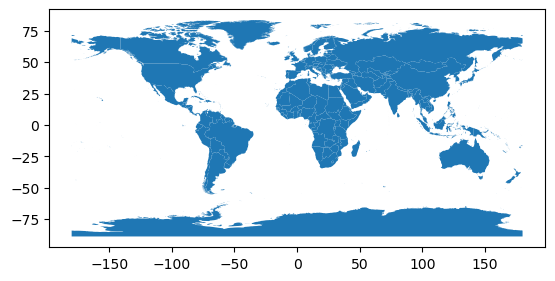

In [21]:
world.plot()

C:\Users\onery\AppData\Local\Temp\ipykernel_16232\4213141844.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  fp = gpd.datasets.get_path("naturalearth_lowres")


<Axes: >

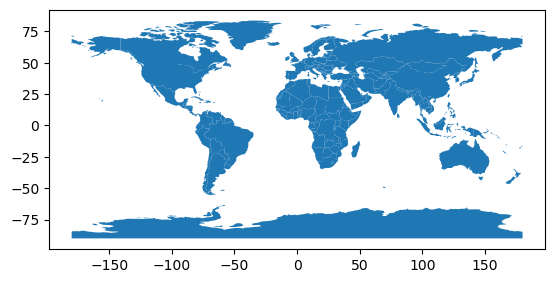

In [22]:
fp = gpd.datasets.get_path("naturalearth_lowres")

admin = gpd.read_file(fp)

admin.plot()

In [23]:
#UCDP dataset turn into geodataframe
#first way
#notice wkt, crs, 4326

gs = gpd.GeoSeries.from_wkt(ucdp['geom_wkt'])
geo_event = gpd.GeoDataFrame(ucdp, geometry=gs, crs="EPSG:4326")

In [24]:
#second way
#notice xy cordinates
# as long as we have cordinates we can visualize.
ucdp["geometry"] = gpd.points_from_xy(x=ucdp["longitude"],
                                      y=ucdp["latitude"],
                                      crs="EPSG:4326")

ucdp = gpd.GeoDataFrame(ucdp)


In [25]:
ucdp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The EPSG code is 4326 which refers to the WGS84 coordinate system. In the geospatial world as it is perhaps the most commonly used coordinate reference system in the world.

In [26]:
#the same geo features

ucdp[['year', 'country', 'latitude', 'longitude', 'geom_wkt', "geometry"]]

year              country   latitude  longitude  \
0       2017          Afghanistan  34.531094  69.162796   
1       1989          Afghanistan  34.333330  70.416670   
2       1989          Afghanistan  36.750000  68.750000   
3       1989          Afghanistan  35.315833  69.038889   
4       1989          Afghanistan  34.531094  69.162796   
...      ...                  ...        ...        ...   
261859  1989  Zimbabwe (Rhodesia) -20.500000  32.500000   
261860  1989  Zimbabwe (Rhodesia) -19.000000  32.500000   
261861  1990  Zimbabwe (Rhodesia) -18.000000  32.833333   
261862  1990  Zimbabwe (Rhodesia) -19.000000  32.500000   
261863  1990  Zimbabwe (Rhodesia) -16.783333  31.583333   

                            geom_wkt                    geometry  
0        POINT (69.162796 34.531094)   POINT (69.16280 34.53109)  
1          POINT (70.41667 34.33333)   POINT (70.41667 34.33333)  
2                POINT (68.75 36.75)   POINT (68.75000 36.75000)  
3        POINT (69.038889 35.315833)   POINT (69.03889 35.31583)  
4        POINT (69.162796 34.531094)   POINT (69.16280 34.53109)  
...                              ...                         ...  
261859            POINT (32.5 -20.5)  POINT (32.50000 -20.50000)  
261860              POINT (32.5 -19)  POINT (32.50000 -19.00000)  
261861         POINT (32.833333 -18)  POINT (32.83333 -18.00000)  
261862              POINT (32.5 -19)  POINT (32.50000 -19.00000)  
261863  POINT (31.583333 -16.783333)  POINT (31.58333 -16.78333)  

[261864 rows x 6 columns]

<Axes: >

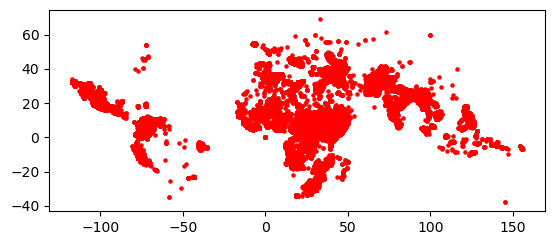

In [27]:
geo_event.plot(color='r', markersize=5)

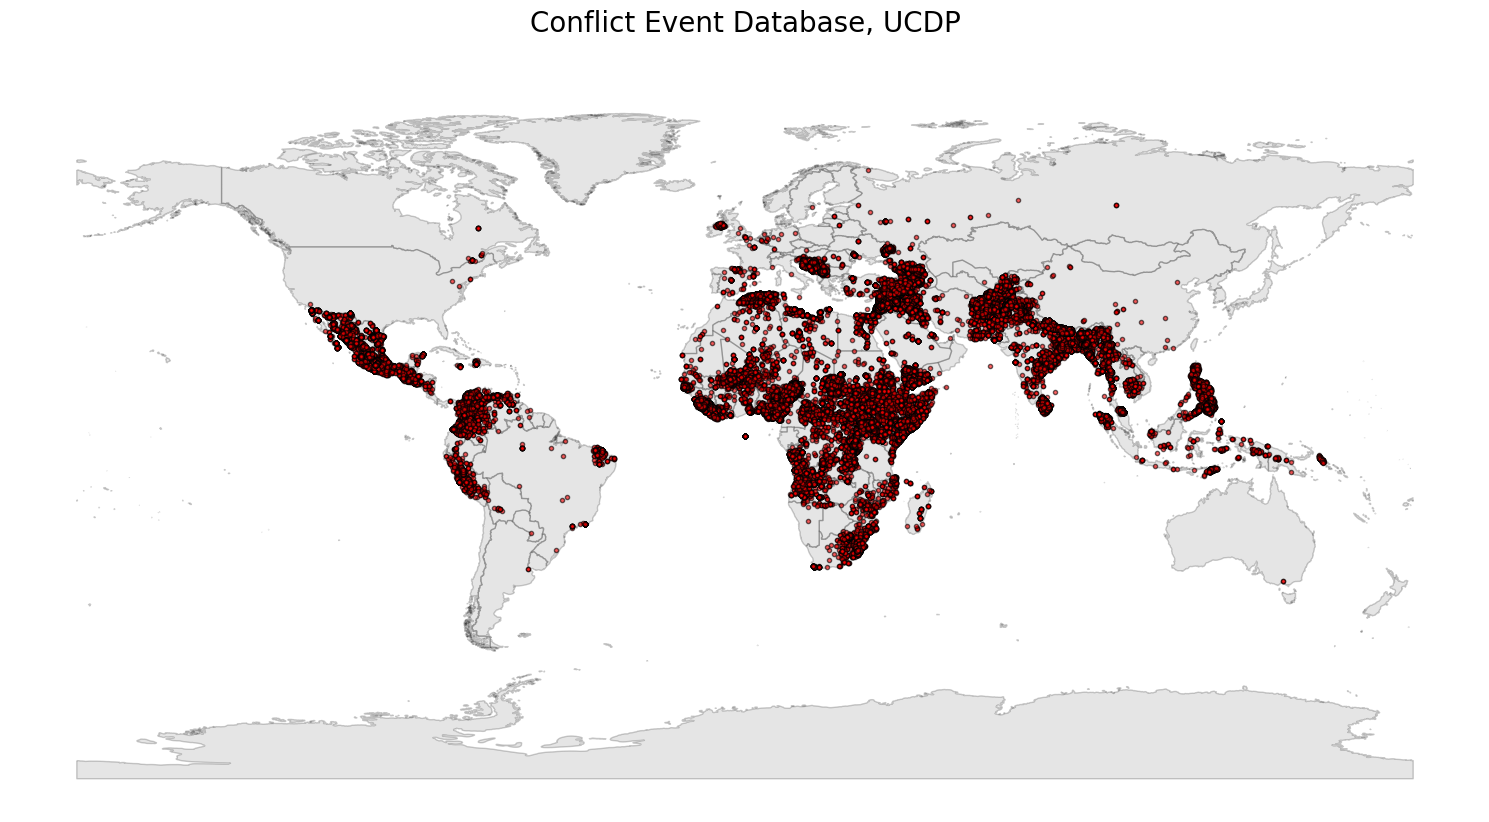

In [28]:
import matplotlib.pyplot as plt

fig, ax= plt.subplots(figsize=(15, 10))

world.plot(ax=ax, alpha=0.2, color='gray', edgecolor='k')
geo_event.plot(ax=ax, c='r', alpha=0.6, edgecolor='k',markersize=9)

ax.set_title('Conflict Event Database, UCDP', pad=35,fontdict={'fontsize':20})
plt.axis('off')
fig.tight_layout()

plt.show()


# Geocoding

Let's say you have some addresses and you want to geocode them. There are ways you can do in geopandas.



In [29]:
# Sample data with addresses (replace these with your own addresses)
data = {
    'Name': ['Place A', 'Place B', 'Place C', 'Place D', 'Place E'],
    'Address': [
        '1600 Amphitheatre Parkway, Mountain View, CA',
        '1 Infinite Loop, Cupertino, CA',
        '350 5th Ave, New York, NY',
        '221B Baker St, London, UK',
        'Eiffel Tower, Paris, France']
    }

In [30]:
df= pd.DataFrame(data)

df

Name                                       Address
0  Place A  1600 Amphitheatre Parkway, Mountain View, CA
1  Place B                1 Infinite Loop, Cupertino, CA
2  Place C                     350 5th Ave, New York, NY
3  Place D                     221B Baker St, London, UK
4  Place E                   Eiffel Tower, Paris, France

In [31]:
# Import the geocoding tool
from geopandas.tools import geocode

# Geocode addresses using Nominatim.
# You can provide your own
geo = geocode(data["Address"],
              provider="nominatim",
              user_agent="pythongis",
              timeout=10)

In [32]:
geo

geometry  \
0  POINT (-122.08461 37.42176)   
1  POINT (-122.03042 37.33140)   
2   POINT (-73.98566 40.74844)   
3    POINT (-0.15824 51.52339)   
4     POINT (2.29450 48.85826)   

                                             address  
0  Google Headquarters, 1600, Amphitheatre Parkwa...  
1  Apple Infinite Loop, 1, Infinite Loop, Apple C...  
2  Empire State Building, 350, 5th Avenue, Manhat...  
3  221B Baker Street, Baker Street, Marylebone, L...  
4  Tour Eiffel, 5, Avenue Anatole France, Quartie...

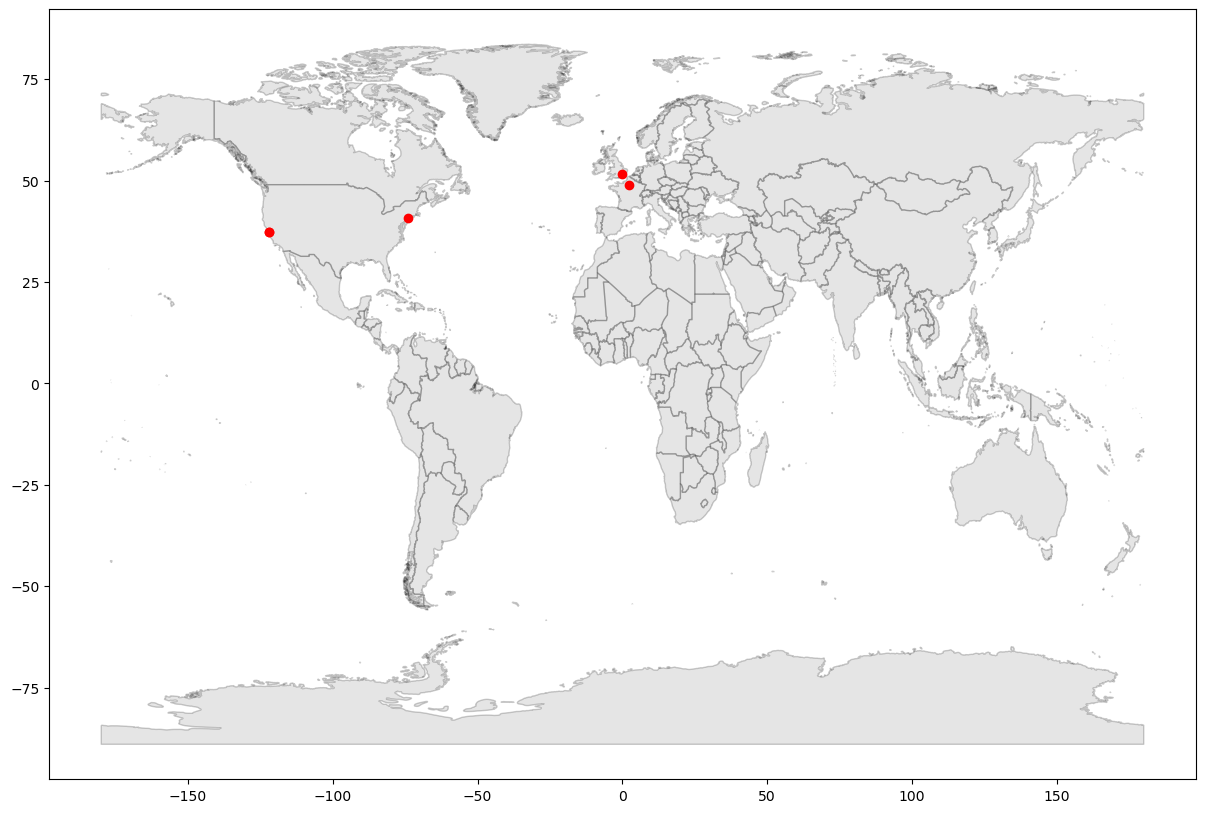

In [33]:
import matplotlib.pyplot as plt

fig, ax= plt.subplots(figsize=(15, 10))
world.plot(ax=ax, alpha=0.2, color='gray', edgecolor='k')
geo.plot(ax=ax, c='r')

plt.show()

In [34]:
pip install geodatasets

Note: you may need to restart the kernel to use updated packages.


In [35]:
import geopandas as gpd
import geodatasets as gds

chicago = gpd.read_file(gds.get_path("geoda.chicago_commpop"))

groceries = gpd.read_file(gds.get_path("geoda.groceries"))

C:\Users\onery\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
Extracting 'chicago_commpop/chicago_commpop.geojson' from 'C:\Users\onery\AppData\Local\geodatasets\geodatasets\Cache\chicago_commpop.zip' to 'C:\Users\onery\AppData\Local\geodatasets\geodatasets\Cache\chicago_commpop.zip.unzip'
Extracting 'grocery/chicago_sup.shp' from 'C:\Users\onery\AppData\Local\geodatasets\geodatasets\Cache\grocery.zip' to 'C:\Users\onery\AppData\Local\geodatasets\geodatasets\Cache\grocery.zip.unzip'
Extracting 'grocery/chicago_sup.dbf' from 'C:\Users\onery\AppData\Local\geodatasets\geodatasets\Cache\grocery.zip' to 'C:\Users\onery\AppData\Local\geodatasets\geodatasets\Cache\grocery.zip.unzip'
Extracting 'grocery/chicago_sup.shx' from 'C:\Users\onery\AppData\Local\geodatasets\geodatasets\Cache\grocery.zip' to 'C:\Users\onery\AppData\Local\geodatasets\geodatasets\Cache\grocery.zip.unzip'
Extracting 'groce

<Axes: >

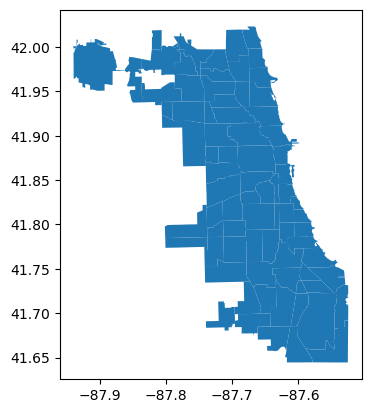

In [36]:
chicago.plot()

<Axes: >

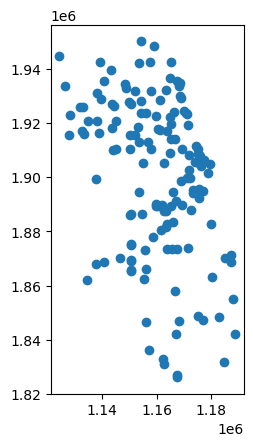

In [37]:
groceries.plot()

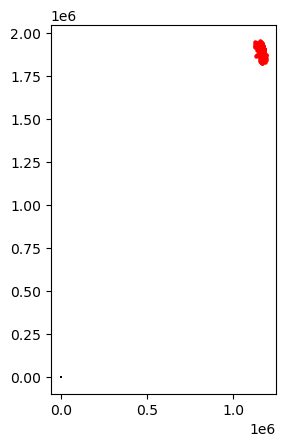

In [38]:
fig, ax = plt.subplots()

chicago.plot(ax=ax, color='white', edgecolor='black')

groceries.plot(ax=ax, marker='o', color='red', markersize=5)

plt.show()

In [39]:
chicago.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [40]:
groceries.crs

<Projected CRS: PROJCS["Transverse_Mercator",GEOGCS["GCS_GRS 1980( ...>
Name: Transverse_Mercator
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: D_unknown
- Ellipsoid: GRS80
- Prime Meridian: Greenwich

In [41]:
# so it looks like they are not using the same crs.
#lets convert one's crs to other
groceries = groceries.to_crs(chicago.crs)

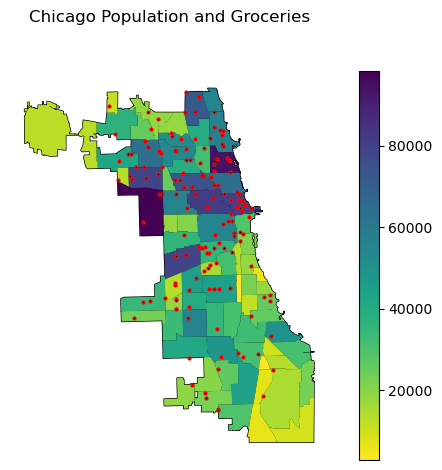

In [42]:
fig, ax = plt.subplots()

chicago.plot(ax=ax, color='white', edgecolor='black')
chicago.plot(ax=ax, column="POP2010", legend=True, cmap='viridis_r')
groceries.plot(ax=ax, marker='o', color='k', markersize=4, edgecolor='red')


ax.set_title('Chicago Population and Groceries', pad=35,fontdict={'fontsize':12})

plt.axis('off')
fig.tight_layout()

plt.show()







# Plotly for GIS

Check out the library [here](https://plotly.com/python/maps/)

In [43]:
import plotly.express as px

df = px.data.election()
geojson = px.data.election_geojson()

print(df["district"][2])
print(geojson["features"][0]["properties"])

11-Sault-au-Récollet
{'district': '11-Sault-au-Récollet'}


In [44]:

# from plotly website

import plotly.express as px

df = px.data.election()
geojson = px.data.election_geojson()

fig = px.choropleth_mapbox(df, geojson=geojson, color="Bergeron",
                           locations="district", featureidkey="properties.district",
                           center={"lat": 45.5517, "lon": -73.7073},
                           mapbox_style="carto-positron", zoom=9)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [45]:
# from plotly website

import plotly.graph_objects as go

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv')
df.head()

df['text'] = df['name'] + '<br>Population ' + (df['pop']/1e6).astype(str)+' million'
limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
cities = []
scale = 5000

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['lon'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['pop']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = '2014 US city populations<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

# OSMnx

OSMnx is pronounced as the initialism: “oh-ess-em-en-ex”. It is built on top of NetworkX and GeoPandas, and interacts with OpenStreetMap APIs.

In [46]:
pip install osmnx

     -------------------------------------- 101.4/101.4 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


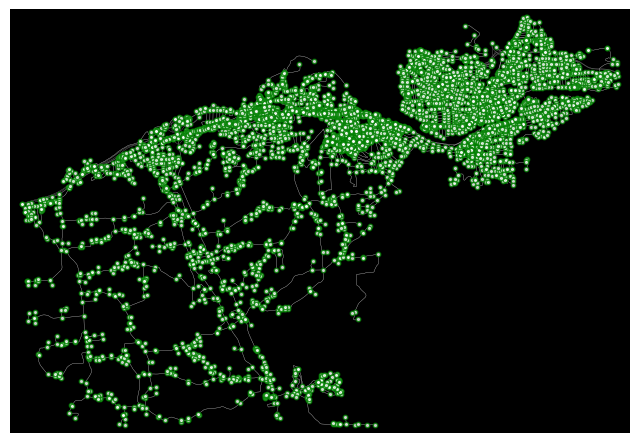

In [47]:
# Here is binghamton

import osmnx as ox
import matplotlib.pyplot as plt


place_name = ["Binghamton, NY", "Vestal, NY"]

# OSM street network from the location
graph = ox.graph_from_place(place_name)
fig, ax = ox.plot_graph(graph, bgcolor='k',
                        node_color='w', node_edgecolor='g',
                        node_size=10, node_alpha=0.8, edge_linewidth=0.2)

<Axes: >

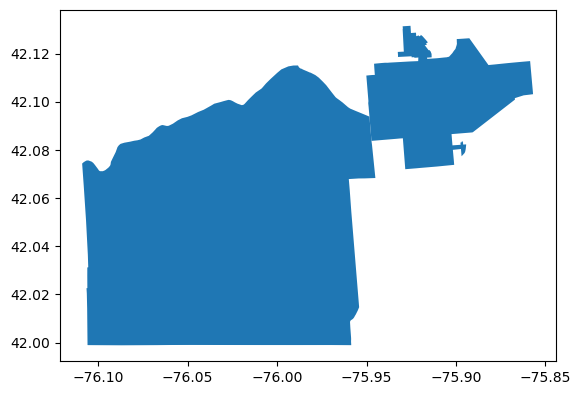

In [48]:
bingo = ox.geocode_to_gdf(place_name)

bingo.plot()

In [49]:
 # buildings


buildings = ox.geometries_from_place(place_name,
                                     tags={'building':True})


C:\Users\onery\AppData\Local\Temp\ipykernel_16232\1441714557.py:4: UserWarning:

The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.



In [50]:
buildings.head(3)

addr:state building  ele gnis:county_name  \
element_type osmid                                                 
node         368044250         NY      yes  334           Broome   
             368044437         NY      yes  262           Broome   
             368044444         NY      yes  273           Broome   

                       gnis:feature_id                      gnis:import_uuid  \
element_type osmid                                                             
node         368044250         2367881  57871b70-0100-4405-bb30-88b2e001a944   
             368044437         2376541  57871b70-0100-4405-bb30-88b2e001a944   
             368044444         2376604  57871b70-0100-4405-bb30-88b2e001a944   

                       gnis:reviewed                     name         source  \
element_type osmid                                                             
node         368044250            no     Goudey Steam Station  USGS Geonames   
             368044437            no     Binghamton Boys Club  USGS Geonames   
             368044444            no  Susquehanna Valley Home  USGS Geonames   

                                          geometry  ... payment:visa  \
element_type osmid                                  ...                
node         368044250  POINT (-75.97417 42.10389)  ...          NaN   
             368044437  POINT (-75.91252 42.10258)  ...          NaN   
             368044444  POINT (-75.88722 42.10028)  ...          NaN   

                       payment:wic baseball  bin healthcare:speciality  \
element_type osmid                                                       
node         368044250         NaN      NaN  NaN                   NaN   
             368044437         NaN      NaN  NaN                   NaN   
             368044444         NaN      NaN  NaN                   NaN   

                       air_conditioning telecom ways type multipolygon  
element_type osmid                                                      
node         368044250              NaN     NaN  NaN  NaN          NaN  
             368044437              NaN     NaN  NaN  NaN          NaN  
             368044444              NaN     NaN  NaN  NaN          NaN  

[3 rows x 129 columns]

In [51]:
#restaurants
restaurants = ox.geometries_from_place(place_name,
                                  tags={"amenity": "restaurant"})

restaurants.head()

C:\Users\onery\AppData\Local\Temp\ipykernel_16232\103359837.py:2: UserWarning:

The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.



amenity                name  \
element_type osmid                                        
node         2447270561  restaurant      Burger Mondays   
             2622916939  restaurant    California Grill   
             2622921967  restaurant        Olive Garden   
             2622922572  restaurant         Red Lobster   
             2622952585  restaurant  Lemongrass Kitchen   

                                                        opening_hours  \
element_type osmid                                                      
node         2447270561                             Mo-Sa 11:30-24:00   
             2622916939                                           NaN   
             2622921967                                   11:00-22:00   
             2622922572                                   11:00-22:00   
             2622952585  Su-Th 16:30-21:00; Fr-Sa 16:30-22:30; Mo off   

                        payment:cash payment:visa wheelchair  \
element_type osmid                                             
node         2447270561          yes          yes         no   
             2622916939          NaN          NaN        NaN   
             2622921967          NaN          NaN        NaN   
             2622922572          NaN          NaN        NaN   
             2622952585          NaN          NaN        NaN   

                        wheelchair:description                    geometry  \
element_type osmid                                                           
node         2447270561     step at front door  POINT (-75.91174 42.10072)   
             2622916939                    NaN  POINT (-76.03779 42.08995)   
             2622921967                    NaN  POINT (-76.03169 42.09121)   
             2622922572                    NaN  POINT (-76.02984 42.09145)   
             2622952585                    NaN  POINT (-76.02728 42.09197)   

                        addr:city addr:housenumber  ... addr:flats nodes  \
element_type osmid                                  ...                    
node         2447270561       NaN              NaN  ...        NaN   NaN   
             2622916939    Vestal              912  ...        NaN   NaN   
             2622921967    Vestal             1112  ...        NaN   NaN   
             2622922572    Vestal             1200  ...        NaN   NaN   
             2622952585    Vestal             1550  ...        NaN   NaN   

                        building area official_name leisure nysgissam:review  \
element_type osmid                                                             
node         2447270561      NaN  NaN           NaN     NaN              NaN   
             2622916939      NaN  NaN           NaN     NaN              NaN   
             2622921967      NaN  NaN           NaN     NaN              NaN   
             2622922572      NaN  NaN           NaN     NaN              NaN   
             2622952585      NaN  NaN           NaN     NaN              NaN   

                        note building:levels building:part  
element_type osmid                                          
node         2447270561  NaN             NaN           NaN  
             2622916939  NaN             NaN           NaN  
             2622921967  NaN             NaN           NaN  
             2622922572  NaN             NaN           NaN  
             2622952585  NaN             NaN           NaN  

[5 rows x 43 columns]

In [52]:
# nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)

<Axes: >

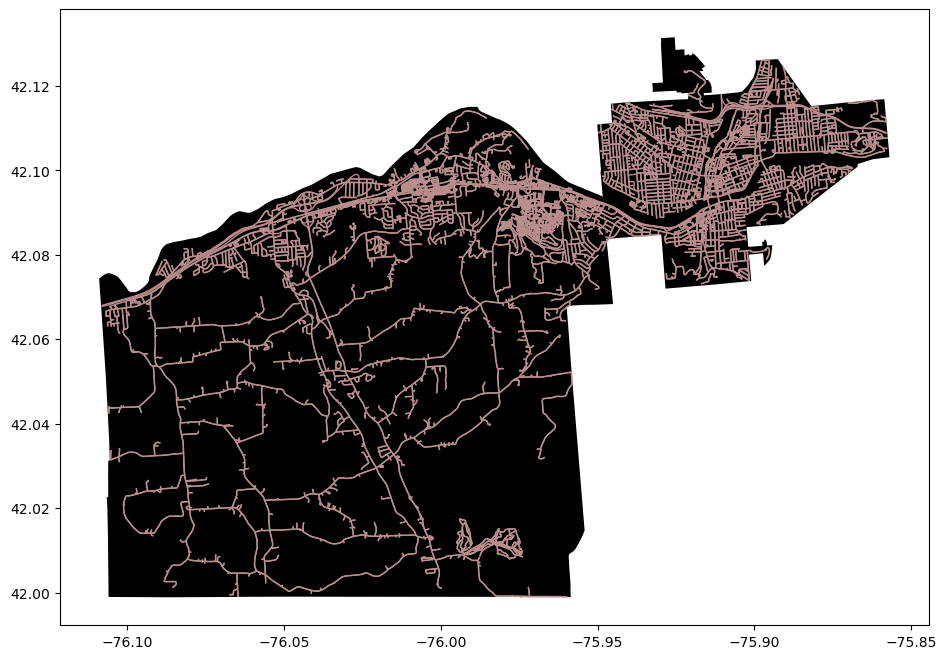

In [53]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
bingo.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

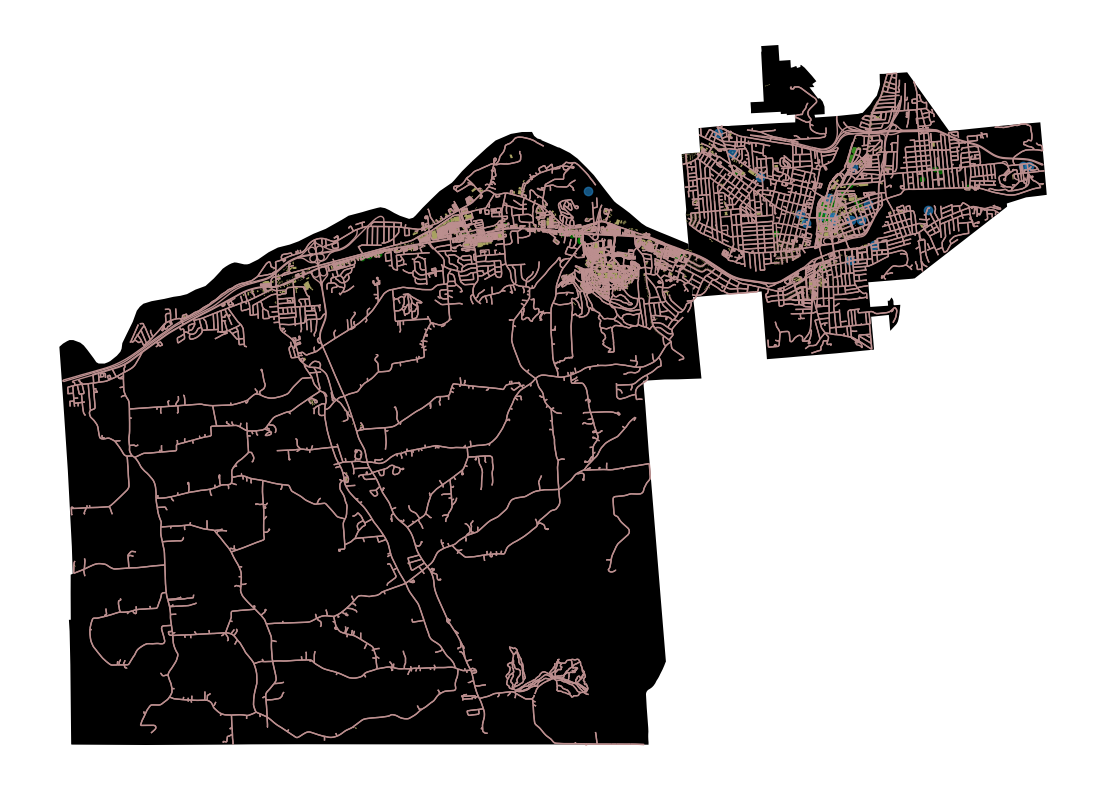

In [54]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
bingo.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='green', alpha=0.7, markersize=10)

plt.axis('off')
fig.tight_layout()